In [94]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input,Conv2D, BatchNormalization, Dropout, MaxPooling2D, Flatten, Dense, Flatten
from tensorflow.keras.applications import VGG16
from tensorflow.keras.optimizers import Adam,SGD,RMSprop
from tensorflow.keras.utils import to_categorical

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

train_images = train_images.reshape((train_images.shape[0], 28, 28, 1)).astype('float32') / 255.0
test_images = test_images.reshape((test_images.shape[0], 28, 28, 1)).astype('float32') / 255.0

train_labels = to_categorical(train_labels, num_classes=10)  # Adjust num_classes to match your dataset
test_labels = to_categorical(test_labels, num_classes=10)

In [95]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    BatchNormalization(),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  # Change the number of neurons to match the number of classes
])

In [96]:
datagen = ImageDataGenerator(
   rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(train_images)

In [97]:
model.compile(optimizer=RMSprop(learning_rate=0.001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [98]:
model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_29 (Conv2D)              │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_23 (MaxPooling2D) │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_31          │ (None, 13, 13, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_30 (Conv2D)              │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_24 (MaxPooling2D) │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_32          │ (None, 5, 5, 64)       │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_31 (Conv2D)              │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_25 (MaxPooling2D) │ (None, 1, 1, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_33          │ (None, 1, 1, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 512)            │        66,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_17 (Dropout)            │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 164,746 (643.54 KB)

 Trainable params: 164,298 (641.79 KB)

 Non-trainable params: 448 (1.75 KB)

In [99]:
model.fit(
    train_images, train_labels,
    batch_size=100,
    epochs=30,
    validation_data=(test_images, test_labels)
)

Epoch 1/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 23s 33ms/step - accuracy: 0.7761 - loss: 0.6165 - val_accuracy: 0.8306 - val_loss: 0.4374
Epoch 2/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.8737 - loss: 0.3441 - val_accuracy: 0.8687 - val_loss: 0.3602
Epoch 3/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.8946 - loss: 0.2909 - val_accuracy: 0.8756 - val_loss: 0.3409
Epoch 4/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 32ms/step - accuracy: 0.9070 - loss: 0.2525 - val_accuracy: 0.8852 - val_loss: 0.3310
Epoch 5/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 20s 33ms/step - accuracy: 0.9154 - loss: 0.2308 - val_accuracy: 0.8750 - val_loss: 0.3500
Epoch 6/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.9202 - loss: 0.2152 - val_accuracy: 0.8934 - val_loss: 0.3466
Epoch 7/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 32ms/step - accuracy: 0.9252 - loss: 0.2000 - val_accuracy: 0.8884 - val_loss: 0.3597
Epoch 8/30
600/600 ━━━━━━━━━━━━━━━━━━━━ 19s 31ms/step - accuracy: 0.9324 - loss: 0.1855 - 

In [100]:
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

313/313 - 2s - 7ms/step - accuracy: 0.8922 - loss: 0.6936

Test accuracy: 0.8921999931335449


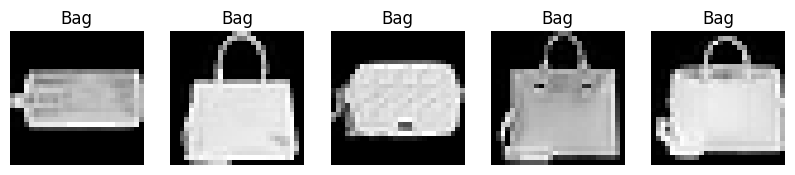

In [101]:
import matplotlib.pyplot as plt
import numpy as np

def plot_images_by_category(images, labels, class_names, category, num_samples=5):
    """
    This function plots a sample of images belonging to a specified category.
    
    Parameters:
    - images: numpy array of images.
    - labels: array of labels corresponding to the images.
    - class_names: list of class names corresponding to the labels.
    - category: specific category to display images from.
    - num_samples: number of images to display from the category.
    """
    # Find the index for the category name
    category_index = class_names.index(category)
    
    # Find all indices where the label matches the category index
    category_indices = np.where(labels == category_index)[0]
    
    # Randomly select images
    if len(category_indices) >= num_samples:
        random_indices = np.random.choice(category_indices, num_samples, replace=False)
        images_to_plot = images[random_indices]

        # Plotting
        plt.figure(figsize=(10, 2))
        for i, image_idx in enumerate(random_indices):
            plt.subplot(1, num_samples, i + 1)
            plt.imshow(images[image_idx].squeeze(), cmap='gray')  # Use cmap='gray' if grayscale
            plt.title(class_names[category_index])
            plt.axis('off')
        plt.show()
    else:
        print(f"Not enough images to sample {num_samples} from category '{category}'.")

# Example usage
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
category = 'Bag'
plot_images_by_category(train_images, np.argmax(train_labels, axis=1), class_names, category, num_samples=5)

In [102]:
for i in range(5):  # Assuming 'test_images' is available
    prediction = model.predict(np.expand_dims(test_images[i], axis=0))
    print("Predicted probabilities:", prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 231ms/step
Predicted probabilities: [[2.3967773e-14 1.0022576e-14 9.2676250e-17 3.7772902e-14 5.2919479e-17
  7.9811515e-13 1.4025536e-16 3.5744439e-11 2.3492197e-13 1.0000000e+00]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
Predicted probabilities: [[3.0097592e-15 4.2171671e-22 1.0000000e+00 7.2430052e-18 2.0111424e-17
  2.4784777e-26 1.2945937e-17 8.5545178e-19 8.7062015e-23 8.6201119e-16]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted probabilities: [[2.2291550e-26 1.0000000e+00 4.9662150e-29 9.5549180e-25 1.2605854e-28
  1.0094867e-29 0.0000000e+00 1.1741819e-31 1.4476437e-24 1.3537293e-32]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted probabilities: [[6.1109531e-28 1.0000000e+00 7.6980545e-27 1.2092206e-22 7.7837884e-24
  6.9434174e-22 1.0847873e-28 1.4158105e-30 7.5811765e-24 4.1698067e-27]]
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Predicted probabilities: [[2.9059374e-04 3.3888625e-07 1.6899419e-04 1.4098646e-07 8.5566014e-01
  2.6094275e-08 1.4387843e-0

In [105]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO
from tensorflow.keras.preprocessing.image import img_to_array

def download_image(image_url):
    try:
        response = requests.get(image_url)
        response.raise_for_status()  # Raises an HTTPError for bad responses
        image = Image.open(BytesIO(response.content))
        return image
    except requests.RequestException as e:
        print("Error downloading the image: ", e)
        return None

def load_and_preprocess_image(image):
    if image is None:
        return None
    try:
        # Convert the image to grayscale and resize it to 28x28
        image = image.convert('L').resize((28, 28))
        # Convert the image to a numpy array and normalize it
        image_array = img_to_array(image) / 255.0
        # Reshape the image to match the input shape of the model
        image_array = np.expand_dims(image_array, axis=0)  # Model expects a batch dimension
        return image_array
    except Exception as e:
        print("Error processing the image: ", e)
        return None

# Define class names as per Fashion MNIST labels
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Example usage
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR5ZetGJ-aiI89-rvSHFMbCn_xFaqJyPPbvIw&s'
image = download_image(image_url)
img = load_and_preprocess_image(image)

if img is not None:
    predictions = model.predict(img)[0]  # Get predictions for the first (and only) image
    # Get the indices of the top 5 predictions
    top_5_indices = np.argsort(predictions)[-5:][::-1]
    top_5_values = predictions[top_5_indices]
    top_5_classes = [class_names[i] for i in top_5_indices]

    # Print the top 5 predictions with their probabilities
    print("Top 5 Predicted Classes with Probabilities:")
    for i in range(5):
        print(f"{top_5_classes[i]}: {top_5_values[i]*100:.2f}%")
else:
    print("Failed to process image.")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Top 5 Predicted Classes with Probabilities:
Trouser: 52.07%
Bag: 41.71%
Sandal: 6.22%
Sneaker: 0.00%
Ankle boot: 0.00%


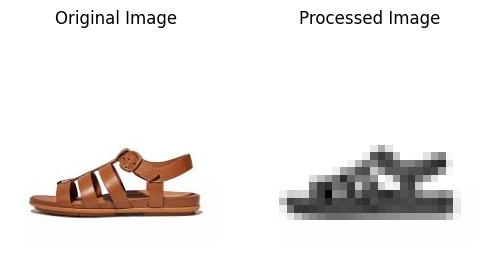

In [106]:
import numpy as np
import requests
from PIL import Image
from io import BytesIO
from tensorflow.keras.preprocessing.image import img_to_array
import matplotlib.pyplot as plt

def download_image(image_url):
    response = requests.get(image_url)
    if response.status_code == 200:
        return Image.open(BytesIO(response.content))
    else:
        return None

def preprocess_and_visualize_image(image):
    if image is None:
        print("Failed to download image.")
        return None

    # Show original image
    plt.figure(figsize=(6, 3))
    plt.subplot(1, 2, 1)
    plt.imshow(image, cmap='gray')
    plt.title("Original Image")
    plt.axis('off')

    # Preprocessing
    image = image.convert('L').resize((28, 28))  # Convert to grayscale and resize
    processed_image = img_to_array(image) / 255.0  # Convert to array and normalize
    processed_image = np.expand_dims(processed_image, axis=0)  # Add batch dimension

    # Show processed image
    plt.subplot(1, 2, 2)
    plt.imshow(processed_image.squeeze(), cmap='gray')  # Squeeze to remove batch dimension for display
    plt.title("Processed Image")
    plt.axis('off')

    plt.show()

    return processed_image

# Example usage
image_url = 'https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcR5ZetGJ-aiI89-rvSHFMbCn_xFaqJyPPbvIw&s'
image = download_image(image_url)
processed_image = preprocess_and_visualize_image(image)

In [107]:
model.save('vini_fashion_model.keras')